In [1]:
## Session Setup

import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
global_sea = pd.read_csv('exploration/berkeleyearth/Data/Sea_Global_Level.csv', comment='#')
global_land = pd.read_fwf('exploration/berkeleyearth/Data/global-land-TAVG-data.txt')
tokyo_land = pd.read_fwf('exploration/berkeleyearth/Data/Tokyo-TAVG-data.txt')
berlin_land = pd.read_fwf('exploration/berkeleyearth/Data/Berlin-TAVG-data.txt')
manila_land = pd.read_fwf('exploration/berkeleyearth/Data/Manila-TAVG-data.txt')
greenland_land = pd.read_fwf('exploration/berkeleyearth/Data/Greenland-TAVG-data.txt')
fairbanks_land = pd.read_fwf('exploration/berkeleyearth/Data/Fairbanks-TAVG-data.txt')

In [3]:
def format_data(data) : # Subset the needed columns and rename as needed
    formatted_data = data.iloc[:,0:4]
    formatted_data.columns = ['Year', 'Month', 'Anomaly', 'Unc']   
    return formatted_data
    
def count_missing(data, name):
    nulls = data.isnull().sum().sum()
    total = data.count()[0]*2 # counting twice to count values in columns Anomaly and Unc
    return [total, nulls, f'{(nulls/total)*100:.2f}%']


global_land = format_data(global_land)
tokyo_land = format_data(tokyo_land)
berlin_land = format_data(berlin_land)
manila_land = format_data(manila_land)
greenland_land = format_data(greenland_land)
fairbanks_land = format_data(fairbanks_land)


global_missing = count_missing(global_land, 'Global Land')
tokyo_missing = count_missing(tokyo_land, 'Tokyo Land')
berlin_missing = count_missing(berlin_land, 'Berlin Land')
manila_missing = count_missing(manila_land, 'Manila Land')
greenland_missing = count_missing(greenland_land, 'Greenland Land')
fairbanks_missing = count_missing(fairbanks_land, 'Fairbanks Land')


df = pd.DataFrame(np.row_stack([global_missing, tokyo_missing, berlin_missing, manila_missing, greenland_missing, 
                                fairbanks_missing]),
            columns = ['# Total Values', '# Missing Values', '# Missing %'])

index = ['Global', 'Tokyo', 'Berlin', 'Manila', 'Greenland', 'Fairbanks']

df.index = index
df

,# Total Values,# Missing Values,# Missing %
Global,6492,2,0.03%
Tokyo,4824,294,6.09%
Berlin,6656,56,0.84%
Manila,4692,580,12.36%
Greenland,5562,320,5.75%
Fairbanks,4620,146,3.16%


In [4]:
# Calculate monthly absolute temperatures 

month_data = [1,2,3,4,5,6,7,8,9,10,11,12]

land_month_avg = [2.61, 3.22, 5.30, 8.30, 11.30, 13.44, 14.31,13.84, 12.05, 9.21, 6.07, 3.64]
tokyo_land_month_avg = [0.84, 1.74, 5.15, 11.10, 16.03, 19.74, 23.57, 24.75, 20.45, 14.15, 8.78, 3.56]
berlin_land_month_avg = [-0.79, 0.15, 3.72, 8.02, 12.96, 16.84, 18.11, 17.75, 14.32, 9.46, 4.51, 0.95]
manila_land_month_avg = [24.91, 25.78, 27.30, 28.58, 28.74, 27.55, 26.71, 26.31, 26.48, 26.37, 25.97, 25.19]
greenland_land_month_avg = [-30.93, -30.70, -29.72, -23.18, -12.63, -5.73, -2.86, -4.92, -12.37, -21.04, -27.27, -30.66]
fairbanks_land_month_avg = [-25.41, -21.04, -14.40,  -3.30,   6.83,  13.04,  14.35,  11.70,   5.06,  -6.07, -16.95, -24.17]


monthly_data = pd.DataFrame(np.column_stack([land_month_avg, tokyo_land_month_avg, berlin_land_month_avg, 
                                             manila_land_month_avg, greenland_land_month_avg,
                                            fairbanks_land_month_avg]),
                           columns = ['Global', 'Tokyo', 'Berlin', 'Manila', 'Greenland', 'Fairbanks'])

index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_data.index = index
monthly_data

,Global,Tokyo,Berlin,Manila,Greenland,Fairbanks
January,2.61,0.84,-0.79,24.91,-30.93,-25.41
February,3.22,1.74,0.15,25.78,-30.70,-21.04
March,5.30,5.15,3.72,27.30,-29.72,-14.40
April,8.30,11.10,8.02,28.58,-23.18,-3.30
May,11.30,16.03,12.96,28.74,-12.63,6.83
June,13.44,19.74,16.84,27.55,-5.73,13.04
July,14.31,23.57,18.11,26.71,-2.86,14.35
August,13.84,24.75,17.75,26.31,-4.92,11.70
September,12.05,20.45,14.32,26.48,-12.37,5.06
October,9.21,14.15,9.46,26.37,-21.04,-6.07


In [6]:
global_monthly_land_avg = pd.DataFrame({'Month': month_data, 'Average': land_month_avg})
tokyo_monthly_land_avg = pd.DataFrame({'Month': month_data, 'Average': tokyo_land_month_avg})
berlin_monthly_land_avg = pd.DataFrame({'Month': month_data, 'Average': berlin_land_month_avg})
manila_monthly_land_avg = pd.DataFrame({'Month': month_data, 'Average': manila_land_month_avg})
greenland_monthly_land_avg = pd.DataFrame({'Month': month_data, 'Average': greenland_land_month_avg})
fairbanks_monthly_land_avg = pd.DataFrame({'Month': month_data, 'Average': fairbanks_land_month_avg})


def calculate_absolute_monthly_temp(anomaly_df, average_df):
    df =  pd.merge(anomaly_df, average_df, on = "Month").sort_values(['Year', 'Month'])
    Date = pd.to_datetime(df['Year'].astype(str) + ' ' + df['Month'].astype(str))
    df = df.set_index(Date)
    df['Monthly_Avg'] = df['Average'] + df['Anomaly']
    df = df.loc[:,('Year', 'Month', 'Monthly_Avg', 'Anomaly', 'Unc')]
    return df  


In [7]:
global_land_abs_monthly = calculate_absolute_monthly_temp(global_land, global_monthly_land_avg)
tokyo_land_abs_monthly = calculate_absolute_monthly_temp(tokyo_land, tokyo_monthly_land_avg)
berlin_land_abs_monthly = calculate_absolute_monthly_temp(berlin_land, berlin_monthly_land_avg)
manila_land_abs_monthly = calculate_absolute_monthly_temp(manila_land, manila_monthly_land_avg)
greenland_land_abs_monthly = calculate_absolute_monthly_temp(greenland_land, greenland_monthly_land_avg)
fairbanks_land_abs_monthly = calculate_absolute_monthly_temp(fairbanks_land, fairbanks_monthly_land_avg)

# convert to yearly - only to plot initial charts
global_land_df_yearly = pd.DataFrame(global_land_abs_monthly.resample('Y').mean())
tokyo_land_df_yearly = pd.DataFrame(tokyo_land_abs_monthly.resample('Y').mean())
manila_land_df_yearly = pd.DataFrame(berlin_land_abs_monthly.resample('Y').mean())
berlin_land_df_yearly = pd.DataFrame(manila_land_abs_monthly.resample('Y').mean())
greenland_land_df_yearly = pd.DataFrame(greenland_land_abs_monthly.resample('Y').mean())
fairbanks_land_df_yearly = pd.DataFrame(fairbanks_land_abs_monthly.resample('Y').mean())

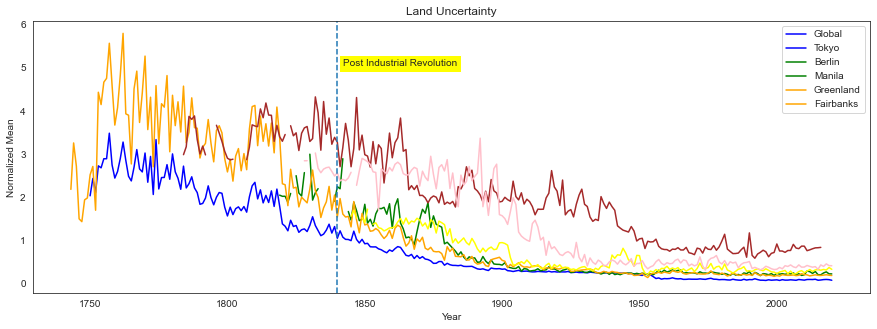

In [25]:
def plot_unc(df, color):
    data_unc = df[['Year','Unc']].set_index('Year').groupby('Year')
    sns.lineplot(ax=ax, data=data_unc.mean(), palette=[color])
    
# locations = {
#     'Global':global_land_abs_monthly, 
#     'Tokyo':tokyo_land_abs_monthly, 
#     'Manila': manila_land_abs_monthly,
#     'Berlin': berlin_land_abs_monthly,
#     'Greenland': greenland_land_abs_monthly,
#     'Fairbanks': fairbanks_land_abs_monthly
# }

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style("white")

plot_unc(global_land_abs_monthly,'blue')
plot_unc(tokyo_land_abs_monthly, 'green')
plot_unc(berlin_land_abs_monthly, 'orange')
plot_unc(manila_land_abs_monthly,'yellow')
plot_unc(greenland_land_abs_monthly, 'brown')
plot_unc(fairbanks_land_abs_monthly, 'pink')

ax.legend(['Uncertainty'])
set_title = 'Land Uncertainty'
ax.set_title(set_title)
ax.set_ylabel('Normalized Mean')
ax.set_xlabel('Year')
ax.legend(['Global', 'Tokyo', 'Berlin', 'Manila', 'Greenland', 'Fairbanks'])

# ax.annotate('Post Industrial Revolution', 
#                xy=(1840, land_abs_month.loc[1840].norm_abs_avg), 
#                xytext=(1840, land_abs_month.loc[1840].norm_abs_avg + 4), 
#                arrowprops={'facecolor': 'black'},
#               )

ax.axvline(x=1840, linestyle='dashed', alpha=1)
y_text = global_land_abs_monthly[['Year','Unc']].set_index('Year').groupby('Year').mean().loc[1840]['Unc'] + 4
ax.text(x=1840 + 2, y=y_text, s='Post Industrial Revolution', bbox={'facecolor': 'yellow'})
fig.savefig('exploration/final_images/all_land_unc.PNG')

pass

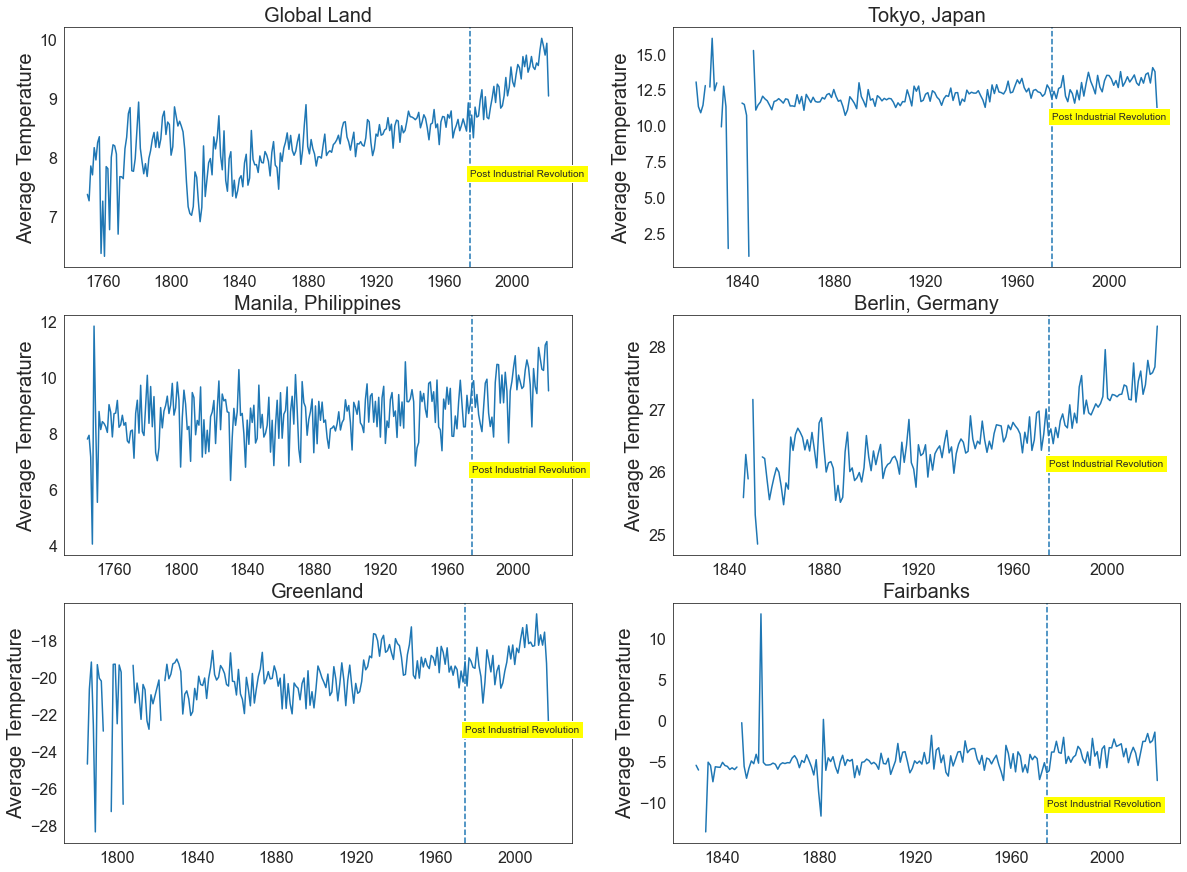

In [26]:
# figure(num=None, figsize=(18, 10)) # increase size of image
# plt.plot(global_land_df_yearly.Monthly_Avg)
# plt.title("Global Land Average")
# plt.xlabel("Time")
# plt.ylabel("Average Temperature")
# plt.legend(loc="upper right")
# plt.show()

fig, axs = plt.subplots(3,2, figsize=(20, 15))
axs[0,0].plot(global_land_df_yearly.Monthly_Avg)
axs[0,0].set_title('Global Land', fontsize = 20)
axs[0,1].plot(tokyo_land_df_yearly.Monthly_Avg)
axs[0,1].set_title('Tokyo, Japan', fontsize = 20)
axs[1,0].plot(manila_land_df_yearly.Monthly_Avg)
axs[1,0].set_title('Manila, Philippines', fontsize = 20)
axs[1,1].plot(berlin_land_df_yearly.Monthly_Avg)
axs[1,1].set_title('Berlin, Germany', fontsize = 20)
axs[2,0].plot(greenland_land_df_yearly.Monthly_Avg)
axs[2,0].set_title('Greenland', fontsize = 20)
axs[2,1].plot(fairbanks_land_df_yearly.Monthly_Avg)
axs[2,1].set_title('Fairbanks', fontsize = 20)

for ax in axs.flat:
    ax.set(ylabel='Average Temperature')
    ax.yaxis.get_label().set_fontsize(20)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    
post_inst_rev = 1840
post_text = 'Post Industrial Revolution'

for ax in axs.flat:
    ax.axvline(x=post_inst_rev, linestyle='dashed', alpha=1)
    
axs[0,0].text(x=post_inst_rev, 
              y=global_land_df_yearly.Monthly_Avg.loc[str(post_inst_rev)], 
              s=post_text, bbox={'facecolor': 'yellow'})
axs[0,1].text(x=post_inst_rev, 
              y=tokyo_land_df_yearly.Monthly_Avg.loc[str(post_inst_rev)] - 1, 
              s=post_text, bbox={'facecolor': 'yellow'})
axs[1,0].text(x=post_inst_rev, 
              y=manila_land_df_yearly.Monthly_Avg.loc[str(post_inst_rev)] - 1, 
              s=post_text, bbox={'facecolor': 'yellow'})
axs[1,1].text(x=post_inst_rev + 5, 
              y=berlin_land_df_yearly.Monthly_Avg.loc[str(post_inst_rev + 5)]+.5, 
              s=post_text, bbox={'facecolor': 'yellow'})
axs[2,0].text(x=post_inst_rev, 
              y=greenland_land_df_yearly.Monthly_Avg.loc[str(post_inst_rev)] - 3, 
              s=post_text, bbox={'facecolor': 'yellow'})
axs[2,1].text(x=post_inst_rev, 
              y=fairbanks_land_df_yearly.Monthly_Avg.loc[str(post_inst_rev)] - 5, 
              s=post_text, bbox={'facecolor': 'yellow'})
fig.savefig('exploration/final_images/regional_land_average_with_annotation.PNG')

pass

In [10]:
def create_heatmap(df, name):    

    FIRST =  1850
    LAST = 2019  # inclusive

    # Reference period for the center of the color scale

    FIRST_REFERENCE = 1951 # TODO: find reasoning for reference period
    LAST_REFERENCE = 1980
    LIM = 0.9 # degree - chosen for color aesthetics

    df_yearly_indexed = df.set_index("Year")

    anomaly = df_yearly_indexed.loc[FIRST:LAST, 'Anomaly'].dropna()
    reference = anomaly.loc[FIRST_REFERENCE:LAST_REFERENCE].mean() # setting the reference for the color scale

    cmap = ListedColormap([
        '#08306b', '#08519c', '#2171b5', '#4292c6',
        '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
        '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
        '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
    ])

    fig = plt.figure(figsize=(10, 2))

    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()
    ax.set_title(name, fontsize = 20)

    col = PatchCollection([
        Rectangle((y, 0), 1, 1)
        for y in range(FIRST, LAST + 1)
    ])

    # set data, colormap and color limits

    col.set_array(anomaly)
    col.set_cmap(cmap)
    col.set_clim(reference - LIM, reference + LIM)
    ax.add_collection(col)

    ax.set_ylim(0, 1)
    ax.set_xlim(FIRST, LAST + 1)

    fig

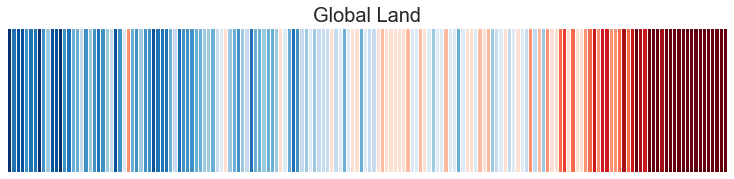

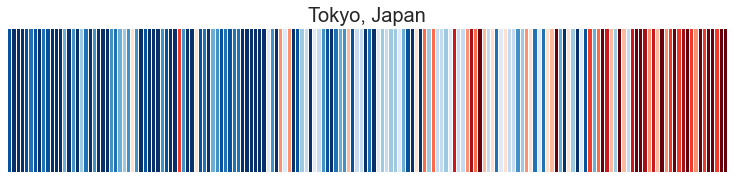

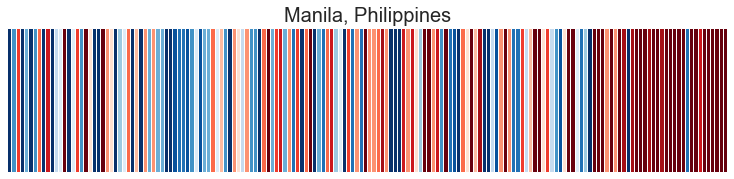

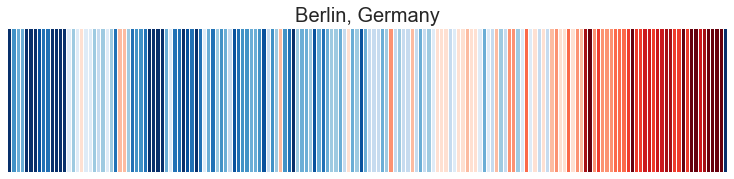

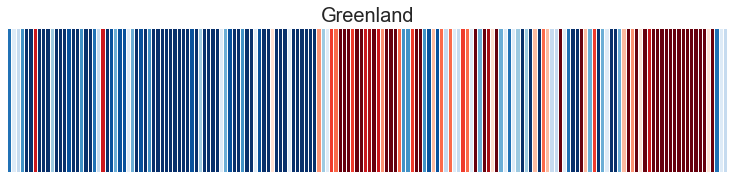

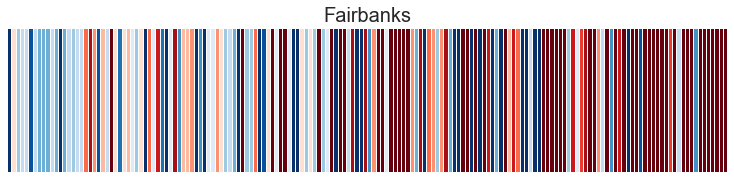

In [11]:
create_heatmap(global_land_df_yearly, name = "Global Land")
create_heatmap(tokyo_land_df_yearly, name = "Tokyo, Japan")
create_heatmap(manila_land_df_yearly, name = "Manila, Philippines")
create_heatmap(berlin_land_df_yearly, name = "Berlin, Germany")
create_heatmap(greenland_land_df_yearly, name = "Greenland")
create_heatmap(fairbanks_land_df_yearly, name = "Fairbanks")

In [12]:
def get_regional_deviation(global_df, regional_df):
    regional_df["deviation"] = global_df.Anomaly - regional_df.Anomaly
#     Date = pd.to_datetime(regional_df['Year'].astype(str) + ' ' + regional_df['Month'].astype(str))
#     regional_df = regional_df.set_index(Date)
    regional_deviation_yearly = pd.DataFrame(regional_df.deviation.resample('Y').mean())
    return regional_deviation_yearly

In [13]:
tokyo_land_deviation = get_regional_deviation(global_land_df_yearly, tokyo_land_df_yearly)
manila_land_deviation = get_regional_deviation(global_land_df_yearly, manila_land_df_yearly)
berlin_land_deviation = get_regional_deviation(global_land_df_yearly, berlin_land_df_yearly)
greenland_land_deviation = get_regional_deviation(global_land_df_yearly, greenland_land_df_yearly)
fairbanks_land_deviation = get_regional_deviation(global_land_df_yearly, fairbanks_land_df_yearly)

In [14]:
# figure(num=None, figsize=(18, 10)) # increase size of image
# plt.plot(global_land_deviation.deviation, label = "Global Land")
# plt.plot(tokyo_land_deviation.deviation, label = "Manila, Philippines")

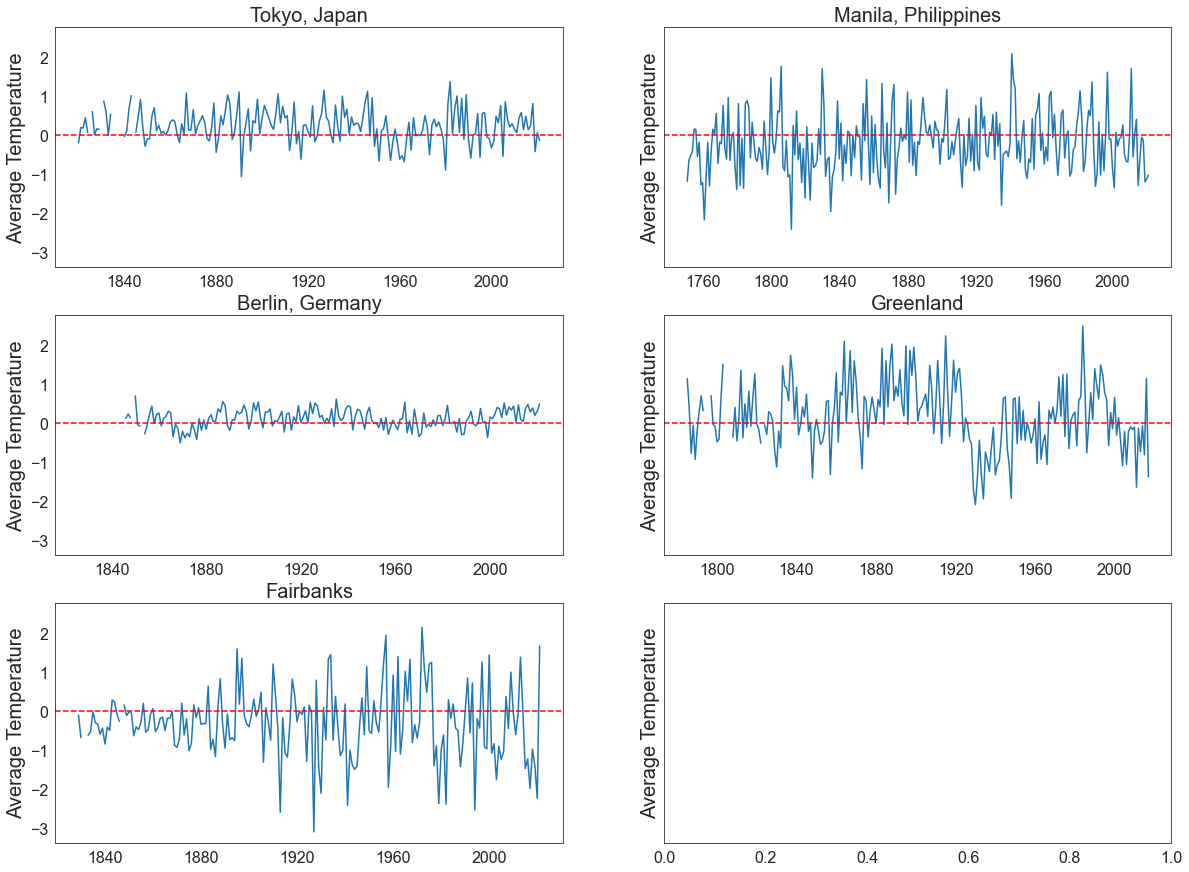

In [27]:
fig, axs = plt.subplots(3,2, figsize=(20, 15), sharey=True)
axs[0,0].plot(tokyo_land_deviation.deviation)
axs[0,0].set_title('Tokyo, Japan', fontsize = 20)
axs[0,0].axhline(0, color = 'red', ls='--')
axs[0,1].plot(manila_land_deviation.deviation)
axs[0,1].set_title('Manila, Philippines', fontsize = 20)
axs[0,1].axhline(0, color = 'red', ls='--')
axs[1,0].plot(berlin_land_deviation.deviation)
axs[1,0].set_title('Berlin, Germany', fontsize = 20)
axs[1,0].axhline(0, color = 'red', ls='--')
axs[1,1].plot(greenland_land_deviation.deviation)
axs[1,1].set_title('Greenland', fontsize = 20)
axs[1,1].axhline(0, color = 'red', ls='--')
axs[2,0].plot(fairbanks_land_deviation.deviation)
axs[2,0].set_title('Fairbanks', fontsize = 20)
axs[2,0].axhline(0, color = 'red', ls='--')

for ax in axs.flat:
    ax.set(ylabel='Average Temperature')
    ax.yaxis.get_label().set_fontsize(20)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)
    
fig.savefig('exploration/final_images/all_anomaly.PNG')

pass

In [16]:
# Anomaly whiskers
# global_land_abs_monthly['Land'] = 'Global'
# tokyo_land_abs_monthly['Land'] = 'Tokyo'
# manila_land_abs_monthly['Land'] = 'Manila'
# berlin_land_abs_monthly['Land'] = 'Berlin'
# greenland_land_abs_monthly['Land'] = 'Greenland'
# fairbanks_land_abs_monthly['Land'] = 'Fairbanks'
# df_cdf = pd.concat([
#     global_land_abs_monthly[['Month','Anomaly', 'Land']], 
#     tokyo_land_abs_monthly[['Month','Anomaly', 'Land']],
#     manila_land_abs_monthly[['Month','Anomaly', 'Land']],
#     berlin_land_abs_monthly[['Month','Anomaly', 'Land']],
#     greenland_land_abs_monthly[['Month','Anomaly', 'Land']],
#     fairbanks_land_abs_monthly[['Month','Anomaly', 'Land']]
#     ])

In [17]:
# Anomaly whiskers
# fig, ax = plt.subplots(figsize=(18,10))
# sns.boxplot(ax=ax, x='Month', y='Anomaly', hue='Land', data=df_cdf, palette='deep')
# sns.despine(left=True)
# # sns.set_style('white')

# ax.set_title('Monthly Land Average')
# ax.set_xlabel('Months')
# ax.set_ylabel('Normalized Absolute Average')
# # ax.set(ylim=(-5.0, 5.0))
# # ax.legend(['Global Avg', 'Tokyo Avg', 'Manila Avg', 'Berlin Avg'])
# ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# pass

In [18]:
# zscore = lambda x: (x-x.mean()) / x.std()

def norm_data(df, month_avg):
    result = pd.merge(df, month_avg, on='Month')
    result['abs_monthly_avg'] = result.Average + result['Monthly_Avg']
    result['Norm_Monthly_Avg'] = result.abs_monthly_avg.transform(lambda x: (x-x.mean()) / x.std())
    return result

In [19]:
global_land_abs_monthly = norm_data(global_land_abs_monthly, 
                                    pd.DataFrame({'Month': month_data, 
                                                  'Average': land_month_avg})).reset_index()
tokyo_land_abs_monthly = norm_data(tokyo_land_abs_monthly, 
                                   pd.DataFrame({'Month': month_data, 
                                                 'Average': tokyo_land_month_avg})).reset_index()
manila_land_abs_monthly = norm_data(manila_land_abs_monthly, 
                                    pd.DataFrame({'Month': month_data, 
                                                  'Average': manila_land_month_avg})).reset_index()
berlin_land_abs_monthly = norm_data(berlin_land_abs_monthly, 
                                    pd.DataFrame({'Month': month_data, 
                                                  'Average': berlin_land_month_avg})).reset_index()
greenland_land_abs_monthly = norm_data(greenland_land_abs_monthly, 
                                       pd.DataFrame({'Month': month_data, 
                                                     'Average': greenland_land_month_avg})).reset_index()
fairbanks_land_abs_monthly = norm_data(fairbanks_land_abs_monthly, 
                                       pd.DataFrame({'Month': month_data, 
                                                     'Average': fairbanks_land_month_avg})).reset_index()

In [20]:
global_land_abs_monthly['Land'] = 'Global'
tokyo_land_abs_monthly['Land'] = 'Tokyo'
manila_land_abs_monthly['Land'] = 'Manila'
berlin_land_abs_monthly['Land'] = 'Berlin'
greenland_land_abs_monthly['Land'] = 'Greenland'
fairbanks_land_abs_monthly['Land'] = 'Fairbanks'
cdf = pd.concat([
    global_land_abs_monthly[['Month','Norm_Monthly_Avg', 'Land']], 
    tokyo_land_abs_monthly[['Month','Norm_Monthly_Avg', 'Land']],
    manila_land_abs_monthly[['Month','Norm_Monthly_Avg', 'Land']],
    berlin_land_abs_monthly[['Month','Norm_Monthly_Avg', 'Land']],
    greenland_land_abs_monthly[['Month','Norm_Monthly_Avg', 'Land']],
    fairbanks_land_abs_monthly[['Month','Norm_Monthly_Avg', 'Land']]
    ])

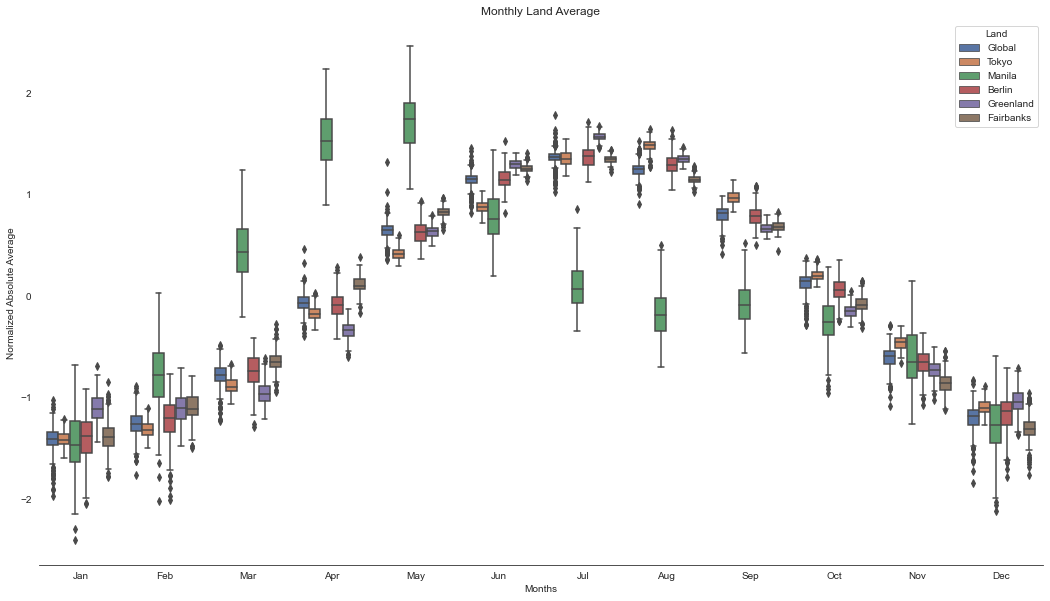

In [28]:
# Normalized whiskers
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(ax=ax, x='Month', y='Norm_Monthly_Avg', hue='Land', data=cdf, palette='deep')
sns.despine(left=True)
# sns.set_style('white')

ax.set_title('Monthly Land Average')
ax.set_xlabel('Months')
ax.set_ylabel('Normalized Absolute Average')
# ax.set(ylim=(-5.0, 5.0))
# ax.legend(['Global Avg', 'Tokyo Avg', 'Manila Avg', 'Berlin Avg'])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
fig.savefig('exploration/final_images/whisker_all_land_by_months.PNG')

pass

In [22]:
def norm_land_vs_region(df_global, df_region, region_title, ax, x, y):
#     sns.set_style('whitegrid')
    sns.lineplot(ax=ax[x,y], data=df_global.groupby(df_global.Month).mean(), x='Month', y='Norm_Monthly_Avg', linewidth=4)
    sns.lineplot(ax=ax[x,y], data=df_region.groupby(df_region.Month).mean(), x='Month', y='Norm_Monthly_Avg')
    sns.despine(left=True)
    axis_set_title = f'Global and {region_title} Land Average By Month'
    set_legend = region_title + ' Land'
    axis_set_legend = ['Global Land', set_legend]
    ax[x,y].set_title(axis_set_title)
    ax[x,y].set_xlabel('Month')
    ax[x,y].set_ylabel('Average Anomaly')
    ax[x,y].set(xticks=range(1,13))
    ax[x,y].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax[x,y].legend(axis_set_legend)

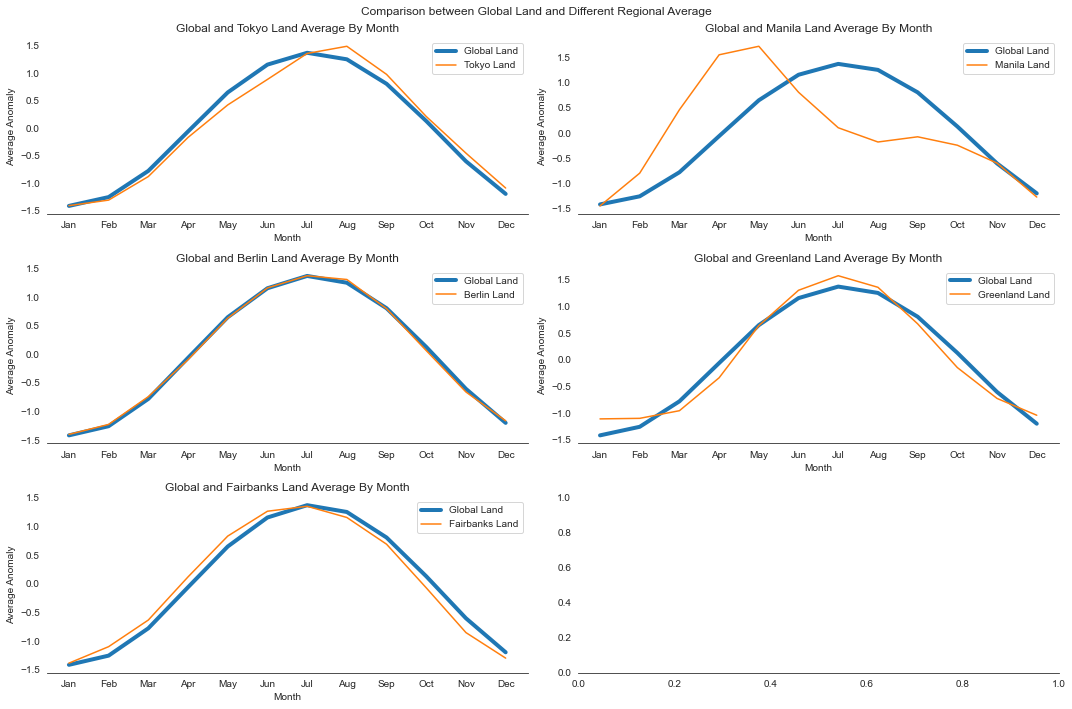

In [30]:
fig, axs = plt.subplots(3,2, figsize=(15,10))

norm_land_vs_region(global_land_abs_monthly, tokyo_land_abs_monthly, 'Tokyo', axs, 0,0)
norm_land_vs_region(global_land_abs_monthly, manila_land_abs_monthly, 'Manila', axs, 0,1)
norm_land_vs_region(global_land_abs_monthly, berlin_land_abs_monthly, 'Berlin', axs, 1,0)
norm_land_vs_region(global_land_abs_monthly, greenland_land_abs_monthly, 'Greenland', axs, 1,1)
norm_land_vs_region(global_land_abs_monthly, fairbanks_land_abs_monthly, 'Fairbanks', axs, 2,0)
plt.suptitle('Comparison between Global Land and Different Regional Average')
plt.tight_layout()
fig.savefig('exploration/final_images/global_vs_region_by_months.PNG')
pass